In [83]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
import warnings
warnings.filterwarnings('ignore')
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import RFECV
from sklearn.feature_selection import RFE
from xgboost import XGBClassifier
from sklearn.pipeline import Pipeline,make_pipeline
from sklearn.grid_search import GridSearchCV, RandomizedSearchCV
from sklearn.feature_selection import SelectKBest
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
import xgboost as xgb

In [2]:
df_train = pd.read_csv('train.csv')
df_test  = pd.read_csv('test.csv')

In [3]:
df_test.keys()

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [4]:
df_train.keys()

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [5]:
df_train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
feature = df_train[['Age','Fare']]
target  = df_test[['Age','Fare']]
data = df_train.append(df_test,ignore_index=True,sort=False)

In [7]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


,Survived
Sex,
female,0.742038
male,0.188908


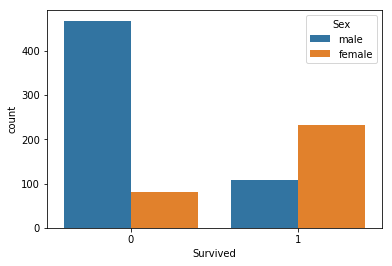

In [8]:
sns.countplot('Survived', hue = 'Sex', data = df_train)
df_train[['Sex','Survived']].groupby('Sex').mean()

In [9]:
Sex_map = {
    'male':1,
    'female':0
}

In [10]:
data['Sex'] = data['Sex'].map(Sex_map).astype('int')
df_train = data[:len(df_train)]
df_test  = data[len(df_train):]

In [11]:
df_train[df_train['Sex'].isna()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


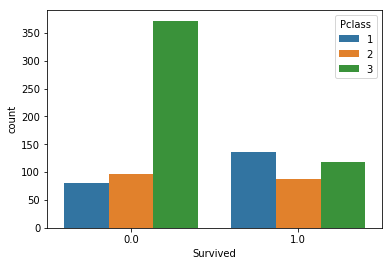

In [12]:
sns.countplot('Survived', hue = 'Pclass', data = df_train)
df_train[['Pclass','Survived']].groupby('Pclass').mean()

In [13]:
data.keys()

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [14]:
df_train.Fare.max()

512.3292

In [15]:
df_train[df_train.Fare == 0][['Pclass','Survived','Fare']]    #guess fare = 0 is Crew

,Pclass,Survived,Fare
179,3,0.0,0.0
263,1,0.0,0.0
271,3,1.0,0.0
277,2,0.0,0.0
302,3,0.0,0.0
413,2,0.0,0.0
466,2,0.0,0.0
481,2,0.0,0.0
597,3,0.0,0.0
633,1,0.0,0.0


In [16]:
data['Crew'] = 0                                                

In [17]:
data['Crew'] = np.where(data['Fare'] == 0 , 1 , 0)

In [18]:
data['Name_class'] = data['Name'].apply(lambda x : x.split(',')[1].split('.')[0])

In [19]:
data['Name_class'].unique()

array([' Mr', ' Mrs', ' Miss', ' Master', ' Don', ' Rev', ' Dr', ' Mme',
       ' Ms', ' Major', ' Lady', ' Sir', ' Mlle', ' Col', ' Capt',
       ' the Countess', ' Jonkheer', ' Dona'], dtype=object)

In [20]:
title = []
mean_age = []
median_age = []
sex = []

In [21]:
for i in data['Name_class'].unique():
    title.append(i)
    mean_age.append(round(data[data['Name_class'] == i]['Age'].mean()))
    median_age.append(round(data[data['Name_class'] == i]['Age'].median()))
    sex.append(data[data['Name_class'] == i]['Sex'].mean())

In [22]:
dict = {'title':title, 'mean_age' : mean_age, 'median_age' : median_age, 'sex' : sex}

In [23]:
pd.DataFrame(data = dict)

,title,mean_age,median_age,sex
0,Mr,32,29,1.000
1,Mrs,37,36,0.000
2,Miss,22,22,0.000
3,Master,5,4,1.000
4,Don,40,40,1.000
5,Rev,41,42,1.000
6,Dr,44,49,0.875
7,Mme,24,24,0.000
8,Ms,28,28,0.000
9,Major,48,48,1.000


In [24]:
for i in data['Name_class'].unique():
    index = data[(data['Name_class'] == i) & (data['Age'].isna())]['Age'].index
    for k in index:
        data.loc[index,'Age'] = round(data[data['Name_class'] == i]['Age'].median())

In [25]:
data.Age.describe()

count    1309.000000
mean       29.442834
std        13.168715
min         0.170000
25%        22.000000
50%        29.000000
75%        36.000000
max        80.000000
Name: Age, dtype: float64

In [26]:
data.Age.max(),data.Age.min()

(80.0, 0.17)

In [27]:
data['Age_class'] = data['Age']

In [28]:
data['Age_class'] = data['Age_class'].apply(lambda x : 0 if x < 17 else 1 )

In [29]:
data[data.Fare.isna()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Crew,Name_class,Age_class
1043,1044,NaN,3,"Storey, Mr. Thomas",1,60.5,0,0,3701,NaN,NaN,S,0,Mr,1


In [30]:
data.loc[data.Fare.isna(),'Fare'] = data.loc[(data.Embarked == 'S') & (data.Pclass == 3),'Fare'].median()

In [31]:
data['Fare_5'] = pd.qcut(data.Fare, 5)
data['Fare_5'] = data['Fare_5'].astype('category').cat.codes

In [32]:
data.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Crew,Name_class,Age_class,Fare_5
count,1309.000000,891.000000,1309.000000,1309,1309.000000,1309.000000,1309.000000,1309.000000,1309,1309.000000,295,1307,1309.000000,1309,1309.000000,1309.000000
unique,NaN,NaN,NaN,1307,NaN,NaN,NaN,NaN,929,NaN,186,3,NaN,18,NaN,NaN
top,NaN,NaN,NaN,"Connolly, Miss. Kate",NaN,NaN,NaN,NaN,CA. 2343,NaN,C23 C25 C27,S,NaN,Mr,NaN,NaN
freq,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,11,NaN,6,914,NaN,757,NaN,NaN
mean,655.000000,0.383838,2.294882,NaN,0.644003,29.442834,0.498854,0.385027,NaN,33.276193,NaN,NaN,0.012987,NaN,0.891520,1.983193
std,378.020061,0.486592,0.837836,NaN,0.478997,13.168715,1.041658,0.865560,NaN,51.743584,NaN,NaN,0.113261,NaN,0.311104,1.424885
min,1.000000,0.000000,1.000000,NaN,0.000000,0.170000,0.000000,0.000000,NaN,0.000000,NaN,NaN,0.000000,NaN,0.000000,0.000000
25%,328.000000,0.000000,2.000000,NaN,0.000000,22.000000,0.000000,0.000000,NaN,7.895800,NaN,NaN,0.000000,NaN,1.000000,1.000000
50%,655.000000,0.000000,3.000000,NaN,1.000000,29.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN,0.000000,NaN,1.000000,2.000000
75%,982.000000,1.000000,3.000000,NaN,1.000000,36.000000,1.000000,0.000000,NaN,31.275000,NaN,NaN,0.000000,NaN,1.000000,3.000000


In [33]:
data['Ticket_info'] = data['Ticket'].apply(lambda x : x.split(' ')[0] if not x.isdigit() else 'X')

In [34]:
data['Ticket_count'] = 0

In [35]:
z = []
for i,k in data.groupby('Ticket')['PassengerId']:              #利用groupby，把所有分類的丟到z
    z.append(k.values)

In [36]:
for i in z:
    for k in i:                                                    #把每個票根的群組數目算出來
        data.loc[data['PassengerId'] == k,'Ticket_count'] = len(i)    

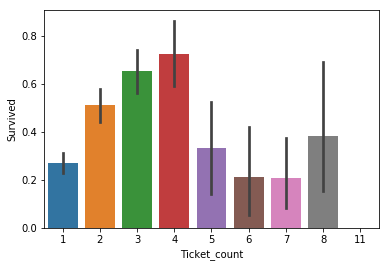

In [37]:
sns.barplot(x = 'Ticket_count', y = 'Survived',data = data)

In [38]:
data.Ticket_count = data.Ticket_count.apply(lambda x : 2 if x > 8 else 1 if (x>4 & x<9) | x == 1 else 0 )

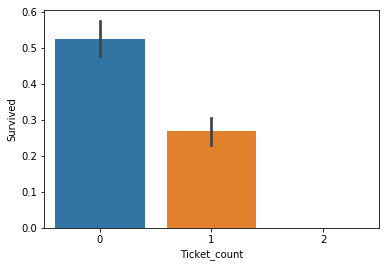

In [39]:
sns.barplot(x = 'Ticket_count', y = 'Survived',data = data)

In [40]:
data.Ticket_count.astype('int32')

0       1
1       0
2       1
3       0
4       1
5       1
6       0
7       0
8       0
9       0
10      0
11      1
12      1
13      0
14      1
15      1
16      0
17      1
18      0
19      1
20      0
21      1
22      1
23      1
24      0
25      0
26      1
27      0
28      1
29      1
       ..
1279    1
1280    0
1281    0
1282    0
1283    0
1284    1
1285    0
1286    0
1287    1
1288    0
1289    1
1290    1
1291    0
1292    0
1293    0
1294    0
1295    1
1296    1
1297    1
1298    0
1299    1
1300    0
1301    1
1302    0
1303    1
1304    1
1305    0
1306    1
1307    1
1308    0
Name: Ticket_count, Length: 1309, dtype: int32

In [41]:
data['Family'] = data['SibSp'] + data['Parch'] +1

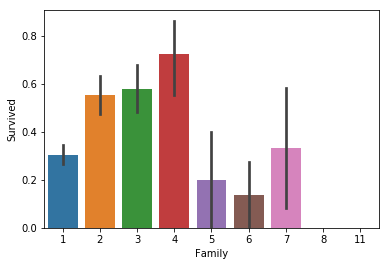

In [42]:
sns.barplot(data = data, x = 'Family', y = 'Survived')

In [43]:
data['Family'] = data['Family'].apply(lambda x : 2 if x > 7 else 1 if (x>4) | x == 1 else 0)

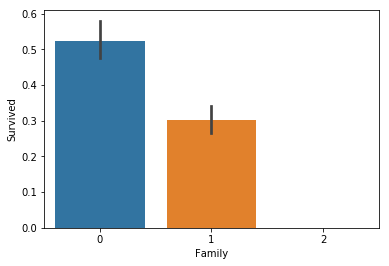

In [44]:
sns.barplot(data = data, x = 'Family', y = 'Survived')

In [45]:
data.keys()
parameter = {'learning_rate': 0.01, 'max_depth': 4, 'n_estimators': 300, 'seed': 0}

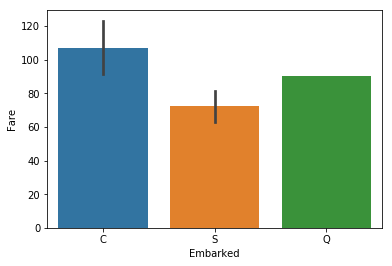

In [46]:
sns.barplot(data = data[(data.Pclass == 1)], x ='Embarked', y = 'Fare')

In [47]:
data['Embarked'] = data['Embarked'].fillna('Q')          #依照在各個船艙中，為女生並且費用中位數最接近80的填入

In [48]:
data['Embarked'] = data['Embarked'] .astype('category').cat.codes

In [49]:
data.keys()

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Crew', 'Name_class',
       'Age_class', 'Fare_5', 'Ticket_info', 'Ticket_count', 'Family'],
      dtype='object')

In [50]:
data.Cabin.describe()

count             295
unique            186
top       C23 C25 C27
freq                6
Name: Cabin, dtype: object

In [51]:
df_train = data[:len(df_train)]
df_test  = data[len(df_train):]
feature = df_train[['Sex','Pclass']]
target  = df_test[['Sex','Pclass']]
model = XGBClassifier()
model.fit(feature,df_train['Survived'])
model.score(feature,df_train['Survived'])   
y_pred = model.predict(target).astype('int')
submission = pd.DataFrame({
        "PassengerId": df_test["PassengerId"],                #只提交 Sex、Pclass   0.75598
        "Survived": y_pred
    })
submission.to_csv('../submission1.csv', index=False)

In [52]:
df_train = data[:len(df_train)]
df_test  = data[len(df_train):]
feature = df_train[['Sex','Pclass','Fare_5']]
target  = df_test[['Sex','Pclass','Fare_5']]
model = XGBClassifier()
model.fit(feature,df_train['Survived'])
model.score(feature,df_train['Survived'])   
y_pred = model.predict(target).astype('int')
submission = pd.DataFrame({
        "PassengerId": df_test["PassengerId"],                #只提交 Sex、Pclass、Fare_5   
        "Survived": y_pred                                    # 0.79425
    })
submission.to_csv('../submission2.csv', index=False)

In [53]:
df_train = data[:len(df_train)]
df_test  = data[len(df_train):]
feature = df_train[['Sex','Pclass','Fare_5','Ticket_count']]
target  = df_test[['Sex','Pclass','Fare_5','Ticket_count']]
model = XGBClassifier()
model.fit(feature,df_train['Survived'])
model.score(feature,df_train['Survived'])   
y_pred = model.predict(target).astype('int')
submission = pd.DataFrame({
        "PassengerId": df_test["PassengerId"],                #只提交 Sex、Pclass、Fare_5、Ticket_count
        "Survived": y_pred                                    # 0.79425
    })
submission.to_csv('../submission3.csv', index=False)

In [54]:
df_train = data[:len(df_train)]
df_test  = data[len(df_train):]
feature = df_train[['Sex','Pclass','Fare_5','Ticket_count','Family']]
target  = df_test[['Sex','Pclass','Fare_5','Ticket_count','Family']]
model = XGBClassifier()
model.fit(feature,df_train['Survived'])
model.score(feature,df_train['Survived'])   
y_pred = model.predict(target).astype('int')
submission = pd.DataFrame({
        "PassengerId": df_test["PassengerId"],                #只提交 Sex、Pclass、Fare_5、Ticket_count、Family
        "Survived": y_pred                                    # 0.79425
    })
submission.to_csv('../submission4.csv', index=False)

In [144]:
df_train = data[:len(df_train)]
df_test  = data[len(df_train):]
feature = df_train[['Sex','Pclass','Fare_5','Ticket_count','Family','Crew']]
target  = df_test[['Sex','Pclass','Fare_5','Ticket_count','Family','Crew']]
model = XGBClassifier()
model.fit(feature,df_train['Survived'])
model.score(feature,df_train['Survived'])   
y_pred = model.predict(target).astype('int')
submission = pd.DataFrame({
        "PassengerId": df_test["PassengerId"],                #只提交 Sex、Pclass、Fare_5、Ticket_count、Family、Crew
        "Survived": y_pred                                    # 0.78947
    })
submission.to_csv('../submission5.csv', index=False)

In [56]:
df_train = data[:len(df_train)]
df_test  = data[len(df_train):]
feature = df_train[['Sex','Pclass','Fare_5','Family']]
target  = df_test[['Sex','Pclass','Fare_5','Family']]
model = XGBClassifier()
model.fit(feature,df_train['Survived'])
model.score(feature,df_train['Survived'])   
y_pred = model.predict(target).astype('int')
submission = pd.DataFrame({
        "PassengerId": df_test["PassengerId"],                #只提交 Sex、Pclass、Fare_5、Family
        "Survived": y_pred                                    # 0.77511
    })
submission.to_csv('../submission6.csv', index=False)

In [57]:
df_train = data[:len(df_train)]
df_test  = data[len(df_train):]
feature = df_train[['Sex','Pclass','Fare_5','Ticket_count','Family','Age_class','Crew']]
target  = df_test[['Sex','Pclass','Fare_5','Ticket_count','Family','Age_class','Crew']]
model = XGBClassifier()
model.fit(feature,df_train['Survived'])
model.score(feature,df_train['Survived'])   
y_pred = model.predict(target).astype('int')
submission = pd.DataFrame({
        "PassengerId": df_test["PassengerId"],                #只提交 Sex、Pclass、Fare_5、Ticket_count、Family、Crew
        "Survived": y_pred                                    # 0.77990
    })
submission.to_csv('../submission7.csv', index=False)

In [58]:
pipe=Pipeline([('select',SelectKBest(k='all')), 
               ('classify', XGBClassifier(random_state = 10))])

param_test = {'classify__n_estimators':list(range(20,50,2)), 
              'classify__max_depth':list(range(3,60,3))}
gsearch = GridSearchCV(estimator = pipe, param_grid = param_test, scoring='roc_auc', cv=10)
gsearch.fit(feature,df_train['Survived'])
print(gsearch.best_params_, gsearch.best_score_)

{'classify__max_depth': 6, 'classify__n_estimators': 44} 0.8675826428021581


In [59]:
df_train = data[:len(df_train)]
df_test  = data[len(df_train):]
feature = df_train[['Sex','Pclass','Fare_5','Ticket_count','Family']]
target  = df_test[['Sex','Pclass','Fare_5','Ticket_count','Family']]
model = XGBClassifier(n_estimators = 40, max_depth = 3)
model.fit(feature,df_train['Survived'])
model.score(feature,df_train['Survived'])   
y_pred = model.predict(target).astype('int')
submission = pd.DataFrame({
        "PassengerId": df_test["PassengerId"],                #只提交 Sex、Pclass、Fare_5、Ticket_count、Family
        "Survived": y_pred                                    # 0.79425
    })
submission.to_csv('../submission9.csv', index=False)

In [60]:
model.score(feature,df_train['Survived'])

0.8103254769921436

In [ ]:
k_cv = StratifiedKFold(n_splits= 5, random_state= 42)

In [66]:
xgb1 = XGBClassifier(
 learning_rate =0.1,
 n_estimators=1000,
 max_depth=5,
 min_child_weight=1,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'binary:logistic',
 nthread=4,
 scale_pos_weight=1,
 seed=27,cv = k_cv)

In [67]:
results = cross_val_score(xgb1, feature, df_train['Survived'], cv=k_cv)

In [68]:
results.mean(),results.std()

(0.7891070850386926, 0.03229918456784459)

In [69]:
for i in range(5,11):
    k_cv = StratifiedKFold(n_splits= i, random_state= 42)
    result = cross_val_score(xgb1, feature,  df_train['Survived'], cv=k_cv)
    print(i,result.mean(),result.std())

5 0.7891070850386926 0.03229918456784459
6 0.7890440776346818 0.04290279748744857
7 0.7891121589712 0.03370697981921461
8 0.7947260369135369 0.03289915166248787
9 0.797979797979798 0.03779451905832266
10 0.7936409034161843 0.03921606100350927


In [157]:
feature = df_train[['Sex','Pclass','Fare_5','Ticket_count','Family','Age_class','Crew']]
target  = df_test[['Sex','Pclass','Fare_5','Ticket_count','Family','Age_class','Crew']]
model = XGBClassifier()
model.fit(feature,df_train['Survived'])
model.score(feature,df_train['Survived'])  

0.8316498316498316

In [160]:
parameter_grid1 = {
 'max_depth':[3,5,7,9],
 'min_child_weight':[1,3,5]
}

In [161]:
grid_search = GridSearchCV(xgb1, param_grid = parameter_grid1, cv = 5)
grid_search.fit(feature,df_train['Survived'])
print("Best score:", grid_search.best_score_)
print("Best param:", grid_search.best_params_)

Best score: 0.8204264870931538
Best param: {'max_depth': 3, 'min_child_weight': 3}


In [162]:
parameter_grid2 = {
 'max_depth':[2,3,4],
 'min_child_weight':[2,3,4]
}

In [163]:
grid_search = GridSearchCV(xgb1, param_grid = parameter_grid2, cv = 5)
grid_search.fit(feature,df_train['Survived'])
print("Best score:", grid_search.best_score_)
print("Best param:", grid_search.best_params_)

Best score: 0.8204264870931538
Best param: {'max_depth': 3, 'min_child_weight': 3}


In [164]:
parameter_grid3 = {
 'gamma':[i/10.0 for i in range(0,5)],
}

In [165]:
grid_search = GridSearchCV( XGBClassifier(
 learning_rate =0.1,
 n_estimators=1000,
 max_depth=3,
 min_child_weight=3,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'binary:logistic',
 nthread=4,
 scale_pos_weight=1,
 seed=27,cv = k_cv), param_grid = parameter_grid3, cv = 5)
grid_search.fit(feature,df_train['Survived'])
print("Best score:", grid_search.best_score_)
print("Best param:", grid_search.best_params_)

Best score: 0.8204264870931538
Best param: {'gamma': 0.0}


In [166]:
parameter_grid4 = {
 'subsample':[i/10.0 for i in range(6,10)],
 'colsample_bytree':[i/10.0 for i in range(6,10)]
}

In [167]:
grid_search = GridSearchCV( XGBClassifier(
 learning_rate =0.1,
 n_estimators=1000,
 max_depth=3,
 min_child_weight=3,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'binary:logistic',
 nthread=4,
 scale_pos_weight=1,
 seed=27,cv = k_cv), param_grid = parameter_grid4, cv = 5)
grid_search.fit(feature,df_train['Survived'])
print("Best score:", grid_search.best_score_)
print("Best param:", grid_search.best_params_)

Best score: 0.8204264870931538
Best param: {'colsample_bytree': 0.8, 'subsample': 0.8}


In [168]:
parameter_grid5 = {
 'subsample':[i/100.0 for i in range(75,90,5)],
 'colsample_bytree':[i/100.0 for i in range(75,90,5)]
}

In [169]:
grid_search = GridSearchCV( XGBClassifier(
 learning_rate =0.1,
 n_estimators=1000,
 max_depth=3,
 min_child_weight=3,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'binary:logistic',
 nthread=4,
 scale_pos_weight=1,
 seed=27,cv = k_cv), param_grid = parameter_grid5, cv = 5)
grid_search.fit(feature,df_train['Survived'])
print("Best score:", grid_search.best_score_)
print("Best param:", grid_search.best_params_)

Best score: 0.8204264870931538
Best param: {'colsample_bytree': 0.75, 'subsample': 0.8}


In [170]:
parameter_grid6 = {
 'reg_alpha':[1e-5, 1e-2, 0.1, 1, 100]
}

In [171]:
grid_search = GridSearchCV( XGBClassifier(
 learning_rate =0.1,
 n_estimators=1000,
 max_depth=3,
 min_child_weight=3,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.75,
 objective= 'binary:logistic',
 nthread=4,
 scale_pos_weight=1,
 seed=27,cv = k_cv), param_grid = parameter_grid6, cv = 5)
grid_search.fit(feature,df_train['Survived'])
print("Best score:", grid_search.best_score_)
print("Best param:", grid_search.best_params_)

Best score: 0.8204264870931538
Best param: {'reg_alpha': 1e-05}


In [174]:
model = XGBClassifier(
 learning_rate =0.01,
 n_estimators=1000,
 max_depth=3,
 min_child_weight=3,                                               
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.75,
 objective= 'binary:logistic',
 nthread=4,
 scale_pos_weight=1,reg_alpha=0.00005,
 seed=27)
model.fit(feature,df_train['Survived'])
model.score(feature,df_train['Survived'])   
y_pred = model.predict(target).astype('int')
submission = pd.DataFrame({                                   # 修改超參數
        "PassengerId": df_test["PassengerId"],                #只提交 Sex、Pclass、Fare_5、Ticket_count、Family、Crew
        "Survived": y_pred                                    # 0.78947
    })
submission.to_csv('../submission11.csv', index=False)

In [175]:
model.score(feature,df_train['Survived']) 

0.8305274971941639

In [177]:
test = XGBClassifier(
 learning_rate =0.01,
 n_estimators=1000,
 max_depth=3,
 min_child_weight=3,                                               
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.75,
 objective= 'binary:logistic',
 nthread=4,
 scale_pos_weight=1,reg_alpha=0.00005,
 seed=27,cv = 5)

In [178]:
for i in range(5,11):
    k_cv = StratifiedKFold(n_splits= i, random_state= 42)
    result = cross_val_score(test, feature,  df_train['Survived'], cv=k_cv)
    print(i,result.mean(),result.std())

5 0.8037141103210989 0.034248021922371974
6 0.818179756938146 0.02397473050618582
7 0.8182448176120841 0.021950550743781768
8 0.8136891965016965 0.02041729201862158
9 0.813692480359147 0.028614026451137954
10 0.8159882533197139 0.03267513923492592
